In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io.fits import getdata

In [2]:
def prepare_data(folder):
    data = getdata(f'{folder}/CenX3.fits')

    return data

In [3]:
data = prepare_data('./2_supplementary/task3/')

In [4]:
data2d, xcoord, ycoord = np.histogram2d(data['X'], data['Y'], range=((400, 600), (400, 600)), bins=(200, 200))

In [5]:
space_vals = np.sqrt((np.arange(400, 600).reshape(1, -1) - 500) ** 2 + (np.arange(400, 600).reshape(-1, 1) - 500) ** 2)

In [6]:
rad_vals = np.zeros(20)
rad_prof = np.zeros(20)
rad_prof_err = np.zeros(20)
for i in range(20):
    condition = (space_vals >= 5 + 5*i) & (space_vals < 10 + 5*i) 
    curr_data = data2d[condition]
    rad_vals[i] = 7.5 + 5*i
    rad_prof[i] = curr_data.mean()
    rad_prof_err[i] = curr_data.std()

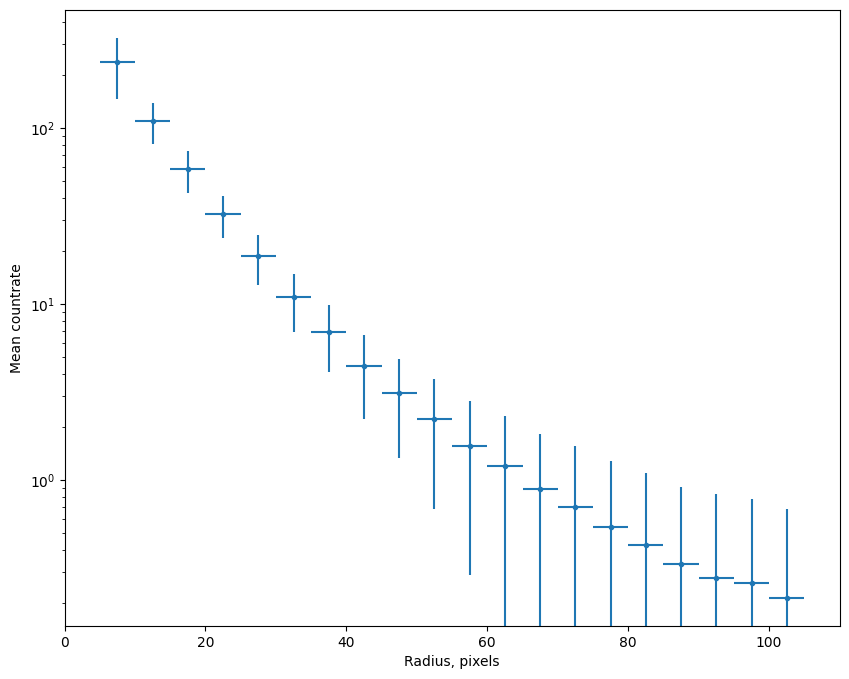

In [7]:
plt.close()
plt.figure(figsize=(10, 8))

plt.errorbar(rad_vals, rad_prof, rad_prof_err, 2.5, fmt='.')
plt.yscale('log')

plt.ylabel('Mean countrate')
plt.xlabel('Radius, pixels')

plt.show()